# 참고 자료
- 송정현 교수
  - https://github.com/jhsongok/Custom_YOLO8
  - https://www.youtube.com/watch?v=PjKKjN20oYw&list=WL&index=23&t=
  - 박성호 https://www.youtube.com/watch?v=em_lOAp8DJE


#1.YOLOv8 사용하기 위한 Setup
- ultraytics github 참조 : https://github.com/ultralytics/ultralytics

In [1]:
# ultralytics 설치
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

- Detect(검출), Segmentation(분할), Tracking(추적), Pose(포즈)

##1-1. Detect(검출)

In [2]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics  import YOLO
import cv2
from google.colab.patches import cv2_imshow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# yolov8n.pt 모델의 아키텍처와 가중치을 함께 불러옴
model=YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 115MB/s]


In [4]:
# 모델 예측
results=model.predict(source='https://ultralytics.com/images/bus.jpg', save=True)

100%|██████████| 134k/134k [00:00<00:00, 9.22MB/s]


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 43.6ms
Speed: 13.4ms preprocess, 43.6ms inference, 340.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


In [5]:
# Jpyter 사용

# img=cv2.imread('./runs/detect/predict/bus.jpg')
# fix_width=400                  # 고정하고 싶은 가로 길이
# height,width=img.shape[:2]     # (1080, 810) 원본 이미지 높이와 너비 추출
# ratio=fix_width / width        # 0.49 너비 비율 계산
# demension=(fix_width, int(height*ratio))   # 400, 533
# img_resize=cv2.resize(img, demension, interpolation=cv2.INTER_AREA)   # 사이즈 변경

# img=cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
# plt.imshow(img)
# plt.axis('off')
# plt.show()

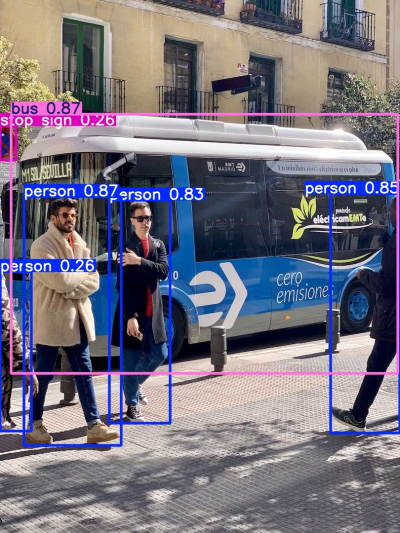

In [6]:
img=cv2.imread('/content/runs/detect/predict/bus.jpg')
fix_width=400
height, width=img.shape[:2]
ratio=fix_width / width
demension=(fix_width, int(height*ratio))
img=cv2.resize(img, demension, interpolation=cv2.INTER_AREA)

cv2_imshow(img)

## 1-2.Segmentation(분할)

In [7]:
# yolov8n-seg.pt 모델의 아키텍처와 가중치을 함께 불러옴
model=YOLO('yolov8n-seg.pt')

100%|██████████| 6.74M/6.74M [00:00<00:00, 130MB/s]


In [8]:
# 모델 예측
results=model.predict(source='https://ultralytics.com/images/bus.jpg', save=True)


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 16.0ms
Speed: 2.4ms preprocess, 16.0ms inference, 14.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict


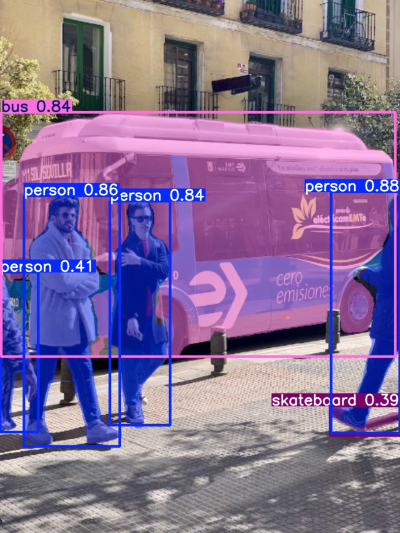

In [9]:
img=cv2.imread('/content/runs/segment/predict/bus.jpg')
fix_width=400
height, width=img.shape[:2]
ratio=fix_width / width
demension =(fix_width, int(height*ratio))
img=cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)

## 1-3.Pose(포즈)
- Pose 모델로 사용할 수 있는 모델의 종류

In [10]:
# yolov8n-pose.pt 모델의 아키텍처와 가중치을 함께 불러옴
model=YOLO('yolov8n-pose.pt')

100%|██████████| 6.52M/6.52M [00:00<00:00, 114MB/s]


In [11]:
# 모델 예측
results=model.predict(source='https://ultralytics.com/images/bus.jpg', save=True)


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 21.0ms
Speed: 4.1ms preprocess, 21.0ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/pose/predict


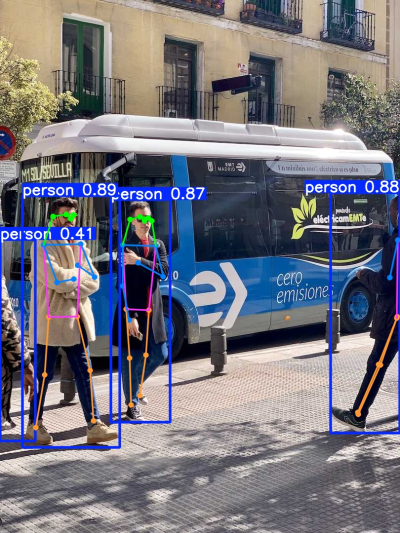

In [12]:
img=cv2.imread('/content/runs/pose/predict/bus.jpg')
fix_width=400
height, width=img.shape[:2]
ratio=fix_width / width
demension=(fix_width, int(height*ratio))
img=cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)

# 2.MyDrive 저장

In [13]:
import shutil
import os

# 복사할 원본 폴더
src='/content/runs/'

# 복사 대상 경로
dst='/content/drive/MyDrive/Colab Notebooks/images/01_Disp'

if os.path.exists(dst):
    print("폴더가 존재합니다.")
else:
    print("폴더가 존재하지 않습니다.")

# 폴더 전체 복사
shutil.copytree(src, dst, dirs_exist_ok=True)   # 덮어쓰기 허용

폴더가 존재합니다.


'/content/drive/MyDrive/Colab Notebooks/images/01_Disp'

In [ ]:
# yolov8n.pt 모델의 아키텍처와 가중치을 함께 불러옴
f_model=YOLO('yolov8n.pt')

In [16]:
results=model.predict(source='/content/drive/MyDrive/Colab Notebooks/images/fruit.jpg',
                      save=True,
                      project='/content/drive/MyDrive/Colab Notebooks/images/',
                      name='02_images_disp')


image 1/1 /content/drive/MyDrive/Colab Notebooks/images/fruit.jpg: 480x640 (no detections), 8.2ms
Speed: 3.0ms preprocess, 8.2ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/drive/MyDrive/Colab Notebooks/images/02_images_disp


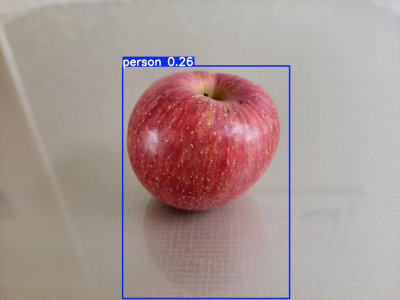

In [17]:
img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/02_images_disp/fruit.jpg')
fix_width=400
height, width=img.shape[:2]
ratio=fix_width / width
demension=(fix_width, int(height*ratio))
img=cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)